##Importar datos

In [ ]:
api_token = {"username":"sebastinsnchezlvarez",
             "key":"474595f0721a595b4611422a012d4995"}

!rm =rf /root/.kaggle.

!mkdir /root/.kaggle

import json
with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(api_token, file)

!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d devansodariya/road-accident-united-kingdom-uk-dataset

import zipfile

archivo_zip = ('/content/road-accident-united-kingdom-uk-dataset.zip')

with zipfile.ZipFile(archivo_zip,'r') as zip_file:
  for nombre_archivo in zip_file.namelist():
    print(nombre_archivo)

import pandas as pd

df = pd.read_csv('/content/road-accident-united-kingdom-uk-dataset.zip', sep=',')
df.head()

rm: cannot remove '=rf': No such file or directory
rm: cannot remove '/root/.kaggle.': No such file or directory
mkdir: cannot create directory ‘/root/.kaggle’: File exists
road-accident-united-kingdom-uk-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
UK_Accident.csv


,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [ ]:
df.shape

(1504150, 33)

In [ ]:
#Se elimina columna con los indices, ya que pandas los agrega automaticamente
df = df.drop('Unnamed: 0', axis = 1)

In [ ]:
#Datos faltantes
faltantes = df.isnull().sum().sum()
print(f'La proporcion de datos faltantes es {round((faltantes/(len(df)*len(list(df.columns))))*100, 2)}%')

La proporcion de datos faltantes es 0.23%


In [ ]:
df.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                             101
Location_Northing_OSGR                              0
Longitude                                         101
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              117
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Control            

##Hay datos faltantes en al menos 3 columnas, además se observa que en cuanto a los datos vacíos estan como NaN pero hay algunos registros como None, se debe revisar si los toma como vacíos, en caso contrario, reemplazar por NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504150 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504150 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1

In [ ]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1.504049e+06,1.504150e+06,1.504049e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06
mean,4.396214e+05,3.001382e+05,-1.436625e+00,5.258587e+01,3.020536e+01,2.838190e+00,1.831606e+00,1.350960e+00,4.118607e+00,3.476149e+02,4.087999e+00,1.009919e+03,3.900540e+01,2.675084e+00,3.815684e+02,1.353871e+00,2.009370e+03
std,9.511616e+04,1.610218e+05,1.398078e+00,1.512524e+00,2.551603e+01,4.018423e-01,7.147586e-01,8.253345e-01,1.924405e+00,2.594292e+02,1.428936e+00,1.823518e+03,1.413993e+01,3.205539e+00,1.302555e+03,4.783534e-01,3.013497e+00
min,6.495000e+04,0.000000e+00,-7.516225e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03
25%,3.750600e+05,1.782600e+05,-2.373902e+00,5.149009e+01,6.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.100000e+02,3.000000e+00,0.000000e+00,3.000000e+01,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03
50%,4.399600e+05,2.688000e+05,-1.403714e+00,5.230888e+01,3.000000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.220000e+02,4.000000e+00,1.290000e+02,3.000000e+01,3.000000e+00,0.000000e+00,1.000000e+00,2.010000e+03
75%,5.230600e+05,3.981500e+05,-2.215100e-01,5.347855e+01,4.500000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.180000e+02,6.000000e+00,7.250000e+02,5.000000e+01,6.000000e+00,0.000000e+00,2.000000e+00,2.012000e+03
max,6.553700e+05,1.208800e+06,1.759398e+00,6.075754e+01,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.410000e+02,6.000000e+00,9.999000e+03,7.000000e+01,6.000000e+00,9.999000e+03,3.000000e+00,2.014000e+03


#Coerción de variables
##'date' a datetime y 'Did_Police_Officer_Attend_Scene_of_Accident' a int

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

df['Did_Police_Officer_Attend_Scene_of_Accident'] = df['Did_Police_Officer_Attend_Scene_of_Accident'].replace(to_replace = 'Yes', value = 1)
df['Did_Police_Officer_Attend_Scene_of_Accident'] = df['Did_Police_Officer_Attend_Scene_of_Accident'].replace(to_replace = 'No', value = 0)
df['Did_Police_Officer_Attend_Scene_of_Accident'] = df['Did_Police_Officer_Attend_Scene_of_Accident'].astype(int)

##Limpieza de los datos

In [ ]:
#revision de datos faltantes
df[df['Junction_Control'] == 'None']['Junction_Control'].isnull().sum()

0

In [ ]:
faltantes = df['LSOA_of_Accident_Location'].isnull()
df[faltantes]['LSOA_of_Accident_Location']

37         NaN
751        NaN
828        NaN
836        NaN
884        NaN
          ... 
1504145    NaN
1504146    NaN
1504147    NaN
1504148    NaN
1504149    NaN
Name: LSOA_of_Accident_Location, Length: 108238, dtype: object

##None lo está tomando como un dato, se reemplazará todos los 'None' por None

In [ ]:
df = df.replace(to_replace='None', value=None)

In [ ]:
#revision de datos faltantes
faltantes = df.isnull().sum().sum()
faltantes

3655911

In [ ]:
print(f'La proporcion real de datos faltantes es {round((faltantes/(len(df)*len(list(df.columns))))*100, 2)}%')

La proporcion real de datos faltantes es 7.6%


In [ ]:
#En la var Special_condition_at_site Carriageway_Hazards los datos vacios
#puede ser reemplazados por 'No special' y 'No hazards' respectivamente
#Esto indicaria que no hay condicion especial en el sitio ni peligros.
df['Special_Conditions_at_Site'].fillna('No special', inplace = True)

df['Carriageway_Hazards'].fillna('No hazard', inplace = True)

#En la variable time, los datos faltantes corresponden a la hora 00:00
df['Time'].fillna('00:00', inplace = True)

In [ ]:
#revision de datos faltantes
faltantes = df.isnull().sum().sum()
faltantes

711326

In [ ]:
print(f'La proporcion de datos faltantes tras estrategia de imputacion es {round((faltantes/(len(df)*len(list(df.columns))))*100, 2)}%')

La proporcion de datos faltantes tras estrategia de imputacion es 1.48%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   Accident_Index                               1504150 non-null  object        
 1   Location_Easting_OSGR                        1504049 non-null  float64       
 2   Location_Northing_OSGR                       1504150 non-null  float64       
 3   Longitude                                    1504049 non-null  float64       
 4   Latitude                                     1504150 non-null  float64       
 5   Police_Force                                 1504150 non-null  int64         
 6   Accident_Severity                            1504150 non-null  int64         
 7   Number_of_Vehicles                           1504150 non-null  int64         
 8   Number_of_Casualties                         1504150

##Se decide estandarizar las variables de interes para comparar modelos con las variables estandarizadas y sin estandarizar

In [ ]:
#Se guardan las variables numericas en df2 y se estandarizan
df2 = df.copy()
df2 = df2.iloc[:,[6,7,8,10,11,17,28,29,31]] #Se incluye unicamente algunas vars cuantitativas de interes

# Forma de estandarización 1 usando stats.zscore de scipy
import pandas as pd
import scipy
from scipy import stats
for i in list(df2.columns):
#si i == Did_Police_Officer_Attend_Scene_of_Accident no estandariza ya que es 1 o 0
#si i == Time no estandariza ya que es la hora
  if i != list(df2.columns)[6] and i != list(df2.columns)[4]:
    df2[i] = stats.zscore(df2[i])
  else:
    pass


In [ ]:
df2.head(5)

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Speed_limit,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-2.08587,-1.163478,-0.425233,-0.581274,17:42,-0.636877,1,0.483783,-1.450048
1,0.40267,-1.163478,-0.425233,-0.061633,17:36,-0.636877,1,0.483783,-1.450048
2,0.40267,0.235596,-0.425233,0.458008,00:15,-0.636877,1,0.483783,-1.450048
3,0.40267,-1.163478,-0.425233,0.977650,10:35,-0.636877,1,0.483783,-1.450048
4,0.40267,-1.163478,-0.425233,-1.100916,21:13,-0.636877,1,0.483783,-1.450048


##El proceso de estandarización mejora la interpretacion de los datos ya que se puede identificar patrones, en este caso categoricos

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##Primer modelo con datos sin estandarizar

Variable respuesta = Hora

Variables predictoras = Limite de velocidad, severidad del accidente, año, la policia atendió el accidente.

In [ ]:
#Para el modelo de regresion sin datos estandar se crea copia y se filtra por
#datos nos vacios para poder correr el modelo

df3 = df.copy()
#Se incluye unicamente algunas vars cuantitativas de interes
df3 = df3.iloc[:,[6,7,8,10,11,17,28,29,31]]

no_vacios = df3.notnull()
df3 = df3[no_vacios]

In [ ]:
df3.describe()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
count,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06
mean,2.838190e+00,1.831606e+00,1.350960e+00,4.118607e+00,3.900540e+01,1.353871e+00,8.103427e-01,2.009370e+03
std,4.018423e-01,7.147586e-01,8.253345e-01,1.924405e+00,1.413993e+01,4.783534e-01,3.920300e-01,3.013497e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,2.005000e+03
25%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01,1.000000e+00,1.000000e+00,2.006000e+03
50%,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.000000e+01,1.000000e+00,1.000000e+00,2.010000e+03
75%,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.000000e+01,2.000000e+00,1.000000e+00,2.012000e+03
max,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,7.000000e+01,3.000000e+00,1.000000e+00,2.014000e+03


#Modelos supervisados

##Modelo sin estandarizar

In [ ]:
# Seleccionamos las variables independientes
X = df3[['Speed_limit', 'Accident_Severity', 'Year', 'Did_Police_Officer_Attend_Scene_of_Accident']]

# Seleccionamos la variable dependiente
y = df3['Number_of_Vehicles']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal múltiple
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Medidas de desempeño
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'MSE en conjunto de entrenamiento: {mse_train}')
print(f'MSE en conjunto de prueba: {mse_test}')
print(f'R^2 en conjunto de entrenamiento: {r2_train}')
print(f'R^2 en conjunto de prueba: {r2_test}')

MSE en conjunto de entrenamiento: 0.5043004979122009
MSE en conjunto de prueba: 0.4992513956481341
R^2 en conjunto de entrenamiento: 0.014825922656813373
R^2 en conjunto de prueba: 0.014969275605214993


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#y_test contiene los valores reales y y_test_pred contiene las predicciones
mape = mean_absolute_percentage_error(y_test, y_test_pred)
print(f'MAPE: {mape:.2f}%')

MAPE: 34.18%


##Modelo estndarizado

In [ ]:
# Seleccionamos las variables independientes
X2 = df2[['Speed_limit', 'Accident_Severity', 'Year', 'Did_Police_Officer_Attend_Scene_of_Accident']]

# Seleccionamos la variable dependiente
y2 = df2['Number_of_Vehicles']

# Dividir los datos en conjuntos de entrenamiento y prueba
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal múltiple
model2 = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model2.fit(X2_train, y2_train)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y2_train_pred = model2.predict(X2_train)
y2_test_pred = model2.predict(X2_test)

# Medidas de desempeño
mse2_train = mean_squared_error(y2_train, y2_train_pred)
mse2_test = mean_squared_error(y2_test, y2_test_pred)
r2_train_2 = r2_score(y2_train, y2_train_pred)
r2_test_2 = r2_score(y2_test, y2_test_pred)

print(f'MSE en conjunto de entrenamiento: {mse2_train}')
print(f'MSE en conjunto de prueba: {mse2_test}')
print(f'R^2 en conjunto de entrenamiento: {r2_train_2}')
print(f'R^2 en conjunto de prueba: {r2_test_2}')

#y2_test contiene los valores reales estadarizados y y2_test_pred contiene las predicciones
mape = mean_absolute_percentage_error(y2_test, y2_test_pred)
print(f'MAPE: {mape:.2f}%')

MSE en conjunto de entrenamiento: 0.9871221317954594
MSE en conjunto de prueba: 0.9772389755995149
R^2 en conjunto de entrenamiento: 0.014825922656813262
R^2 en conjunto de prueba: 0.014969275605214438
MAPE: 99.39%


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([

    # Input layer
    layers.Dense(4, activation='relu', input_shape=(4,)),

    # Hidden layers
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),


    # Output layer
    layers.Dense(1, activation='linear')
])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   Accident_Index                               1504150 non-null  object        
 1   Location_Easting_OSGR                        1504049 non-null  float64       
 2   Location_Northing_OSGR                       1504150 non-null  float64       
 3   Longitude                                    1504049 non-null  float64       
 4   Latitude                                     1504150 non-null  float64       
 5   Police_Force                                 1504150 non-null  int64         
 6   Accident_Severity                            1504150 non-null  int64         
 7   Number_of_Vehicles                           1504150 non-null  int64         
 8   Number_of_Casualties                         1504150

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convertir el tipo de datos de las variables relevantes
df_features = df[['Speed_limit', 'Accident_Severity', 'Year', 'Did_Police_Officer_Attend_Scene_of_Accident']]

# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(df_features, df['Number_of_Vehicles'], test_size=0.2, random_state=42)


In [ ]:
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,2005-01-04,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,No special,No hazard,1,1,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,2005-01-05,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,No special,No hazard,1,1,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,2005-01-06,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,No special,No hazard,1,1,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,2005-01-07,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,No special,No hazard,1,1,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,2005-01-10,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,No special,No hazard,1,1,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,2014-12-07,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,No special,No hazard,2,1,NaN,2014
1504146,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,2014-12-11,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,No special,No hazard,2,1,NaN,2014
1504147,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,2014-12-09,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,No special,No hazard,2,1,NaN,2014
1504148,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,2014-12-17,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,No special,No hazard,2,1,NaN,2014


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error', metrics=['mape'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10)


Epoch 1/10
37604/37604 [==============================] - 103s 3ms/step - loss: 242.7130 - mape: 43.0342
Epoch 2/10
37604/37604 [==============================] - 98s 3ms/step - loss: 0.5174 - mape: 34.6470
Epoch 3/10
37604/37604 [==============================] - 88s 2ms/step - loss: 0.5174 - mape: 34.6363
Epoch 4/10
37604/37604 [==============================] - 83s 2ms/step - loss: 0.5175 - mape: 34.6396
Epoch 5/10
37604/37604 [==============================] - 88s 2ms/step - loss: 0.5172 - mape: 34.6248
Epoch 6/10
37604/37604 [==============================] - 83s 2ms/step - loss: 0.5175 - mape: 34.6429
Epoch 7/10
37604/37604 [==============================] - 81s 2ms/step - loss: 0.5174 - mape: 34.6370
Epoch 8/10
37604/37604 [==============================] - 81s 2ms/step - loss: 0.5174 - mape: 34.6341
Epoch 9/10
37604/37604 [==============================] - 81s 2ms/step - loss: 0.5174 - mape: 34.6312
Epoch 10/10
37604/37604 [==============================] - 80s 2ms/step - loss:

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)


9401/9401 [==============================] - 15s 2ms/step


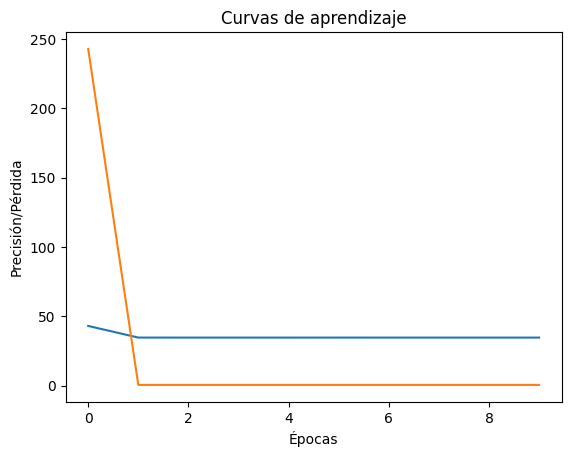

In [ ]:
import matplotlib.pyplot as plt

# Generar las curvas de aprendizaje
plt.plot(history.history['mape'])
plt.plot(history.history['loss'])
plt.title('Curvas de aprendizaje')
plt.xlabel('Épocas')
plt.ylabel('Precisión/Pérdida')
plt.show()